## Linear Regression
Linear Regression is: A method to help us understand the relationship between two variables: The predictor (independent) variable x sometimes called a feature The target (dependent) variable y

In pythorch we call the prediction step the forward step

In [1]:
import torch

In [2]:
w = torch.tensor(2.0, requires_grad = True)
b = torch.tensor(-1.0, requires_grad = True)

In [3]:
def forward(x):
    y = w*x+b
    return y

In [4]:
x = torch.tensor([1.0])

yhat = forward(x)

In [5]:
yhat

tensor([1.], grad_fn=<AddBackward0>)

### Class Linear

In [6]:
from torch.nn import Linear
#randomize weight (slope) and bias
torch.manual_seed(1)

model = Linear(in_features=1, out_features=1) 
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [7]:
model(x)

tensor([0.0739], grad_fn=<ViewBackward0>)

In [8]:
x = torch.tensor([[1.0],[2.0]])
yhat = model(x)
yhat

tensor([[0.0739],
        [0.5891]], grad_fn=<AddmmBackward0>)

### Custom model
using the package torch.nn, A custom module allows us to wrap multiple objects to make more complex modules

In [9]:
import torch.nn as nn

In [11]:
class LR(nn.Module):
    def __init__(self, in_size, output_size):
        super(LR,self).__init__()
        self.linear = nn.Linear(in_size, output_size)
        
    def forward(self, x):
        out = self.linear(x)
        return out

In [13]:
model = LR(1, 1)
yhat = model.forward(torch.tensor([1.0]))
yhat

tensor([-0.3417], grad_fn=<ViewBackward0>)

In [14]:
# change bias and weight values 
model.state_dict()['linear.weight'].data[0] = torch.tensor([0.5153])
model.state_dict()['linear.bias'].data[0] = torch.tensor([-0.5153])

In [15]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.5153], requires_grad=True)]


In [18]:
model = LR(1, 1)
yhat = model(torch.tensor([[1.0], [1.0], [5.0]]))
yhat

tensor([[0.3267],
        [0.3267],
        [1.4361]], grad_fn=<AddmmBackward0>)

In [19]:
model.state_dict()

OrderedDict([('linear.weight', tensor([[0.2774]])),
             ('linear.bias', tensor([0.0493]))])

### Linear Regression Training
#### Loss
loss(w) = y compared to yhat(wx) = number
#### Gradient Descent
Gradient descent is a method used to find the minimum of a function. 
#### Cost
The cost or loss function is the average loss of the model 

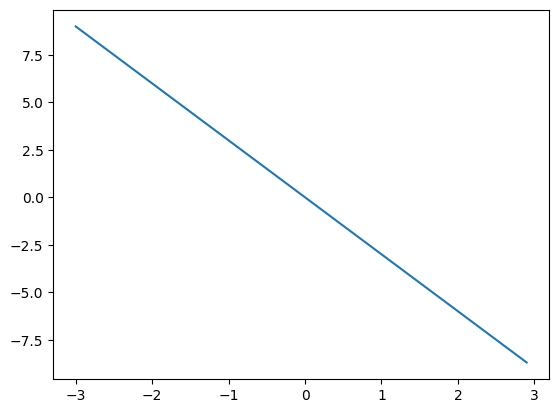

In [26]:
w = torch.tensor(-10.0, requires_grad=True)
X = torch.arange(-3, 3, 0.1).view(-1,1)
f = -3 * X

import matplotlib.pyplot as plt

plt.plot(X.numpy(), f.numpy())
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

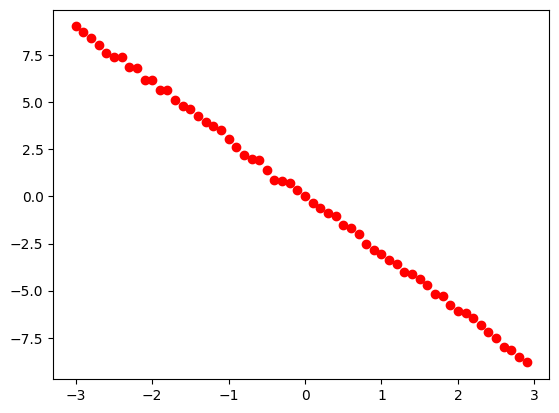

In [27]:
Y = f + 0.1 * torch.randn(X.size())
plt.plot(X.numpy(), Y.numpy(), "ro")
plt.show

In [29]:
def forward(x):
    return w * x

def criterion(yhat,y):
    return torch.mean((yhat - y)**2)

lr = 0.1

In [31]:
for epoch in range(4):
    yhat = forward(X)
    loss = criterion(yhat=yhat, y=Y)
    loss.backward()
    w.data = w.data-lr*w.grad.data
    w.grad.data.zero_()